In [5]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
import fractions

def complex_fraction_formatter(x):
    def fraction_str(n):
        return str(fractions.Fraction(n).limit_denominator())

    if isinstance(x, complex):
        real_part = fraction_str(x.real)
        imag_part = fraction_str(x.imag)
        return f"({real_part} + {imag_part}j)"
    else:
        return fraction_str(x)

np.set_printoptions(formatter={'all': complex_fraction_formatter})


def plot_complex_numbers_with_hull(numbers):
    # Convert complex numbers to a 2D array of points
    points = np.array([[num.real, num.imag] for num in numbers])

    # Compute the convex hull
    hull = ConvexHull(points, qhull_options="QJ Pp")

    # Plotting the complex numbers
    plt.figure(figsize=(8, 8))
    plt.scatter(points[:, 0], points[:, 1], color='blue')

    # Plotting the convex hull
    for simplex in hull.simplices:
        plt.plot(points[simplex, 0], points[simplex, 1], 'k-')

    # Filling the convex hull
    plt.fill(points[hull.vertices,0], points[hull.vertices,1], 'k', alpha=0.1)

    # Setting plot properties
    plt.title('Complex Numbers with Convex Hull')
    plt.xlabel('Real Part')
    plt.ylabel('Imaginary Part')
    plt.axhline(y=0, color='k')  # x-axis
    plt.axvline(x=0, color='k')  # y-axis
    plt.grid(True)
    plt.show()

def generate_random_unit_vector(n):
    """
    Generate a random unit vector in C^n.

    :param n: Number of dimensions
    :return: A unit vector in C^n
    """
    # Generate a random complex vector
    random_vector = np.random.randn(n) + 1j * np.random.randn(n)

    # Normalize the vector to make it a unit vector
    norm = np.linalg.norm(random_vector)
    unit_vector = random_vector / norm

    return unit_vector

# Example usage
n_dimensions = 2
A = np.array([
    [2, 0],
    [0, -1]
])
points = []
draws = 20000
for i in range(draws):
    u = generate_random_unit_vector(n_dimensions)
    points.append(np.dot(np.dot(u.conj().T, A), u))

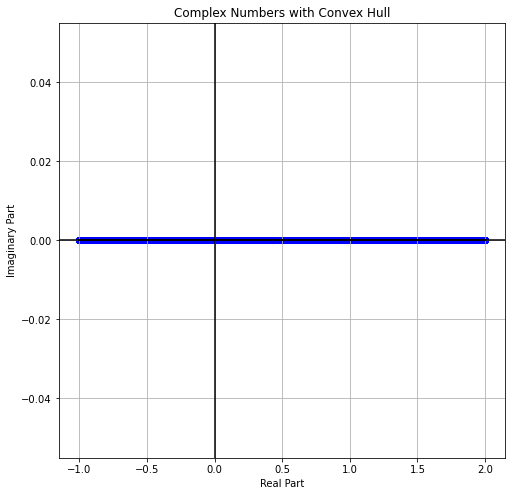

In [2]:
plot_complex_numbers_with_hull(points)

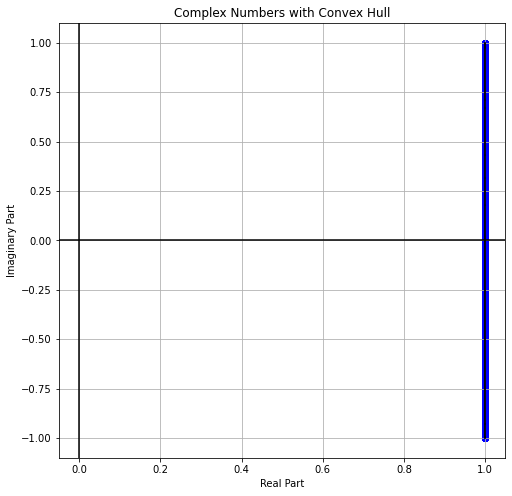

In [9]:
A = np.array([
    [1, -1j],
    [-1j, 1],
])
points = []
draws = 20000
n_dimensions = 2
for i in range(draws):
    u = generate_random_unit_vector(n_dimensions)
    points.append(np.dot(np.dot(u.conj().T, A), u))

plot_complex_numbers_with_hull(points)

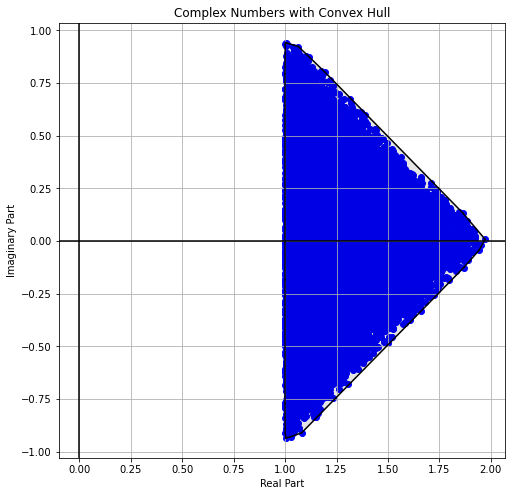

In [15]:
A = np.array([
    [1, -1j, 0, 0],
    [-1j, 1, 0, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 2]
])


points = []
draws = 20000
n_dimensions = 4
for i in range(draws):
    u = generate_random_unit_vector(n_dimensions)
    points.append(np.dot(np.dot(u.conj().T, A), u))

plot_complex_numbers_with_hull(points)

In [23]:
def redheffer_matrix(n):
    matrix = np.zeros((n, n), dtype=int)
    for i in range(1, n+1):
        for j in range(1, n+1):
            if j == 1 or j % i == 0:
                matrix[i-1, j-1] = 1
    return matrix

points = []
draws = 200
n_dimensions = 50000
A = redheffer_matrix(n_dimensions)
for i in range(draws):
    u = generate_random_unit_vector(n_dimensions)
    points.append(np.dot(np.dot(u.conj().T, A), u))

plot_complex_numbers_with_hull(points)

KeyboardInterrupt: 